# Name: EMAIL SPAM CLASSIFIER

# Importing the necessary libraries

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Data Collection

In [2]:
#Loading the dataset
data = pd.read_csv('emails.csv')

In [113]:
data.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


# Data Preprocessing

In [112]:
#Handling missing values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64


# Data Visualization

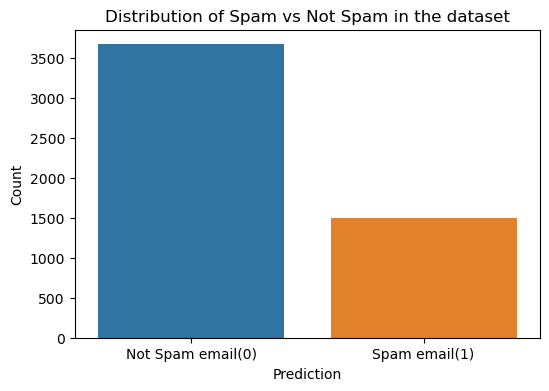

In [55]:
#Count of spam vs not spam
plt.figure(figsize=(6, 4))
sns.countplot(x='Prediction', data=data)
plt.title('Distribution of Spam vs Not Spam in the dataset')
plt.xlabel('Prediction')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Spam email(0)', 'Spam email(1)'])
plt.show()


In [56]:
word_counts_spam = data[data['Prediction'] == 1].drop(['Email No.', 'Prediction'], axis=1).sum()
word_counts_not_spam = data[data['Prediction'] == 0].drop(['Email No.', 'Prediction'], axis=1).sum()

#Sorting the words based on their counts in descending order
top_words_spam = word_counts_spam.sort_values(ascending=False)[:10]
top_words_not_spam = word_counts_not_spam.sort_values(ascending=False)[:10]

#top 10 words/letters for spam emails
print("Top 10 words/letters in Spam Emails:")
for word, count in top_words_spam.items():
    print(f"{word}: {count}")

#top 10 words for not spam emails
print("\nTop 10 words/letters in Not Spam Emails:")
for word, count in top_words_not_spam.items():
    print(f"{word}: {count}")

Top 10 words/letters in Spam Emails:
e: 151062
t: 109878
a: 105425
o: 103997
i: 100761
n: 90840
r: 89645
s: 83720
l: 58852
c: 54181

Top 10 words/letters in Not Spam Emails:
e: 287499
t: 202913
a: 181711
o: 180973
n: 157937
r: 145229
i: 136416
s: 132531
l: 101465
c: 100509


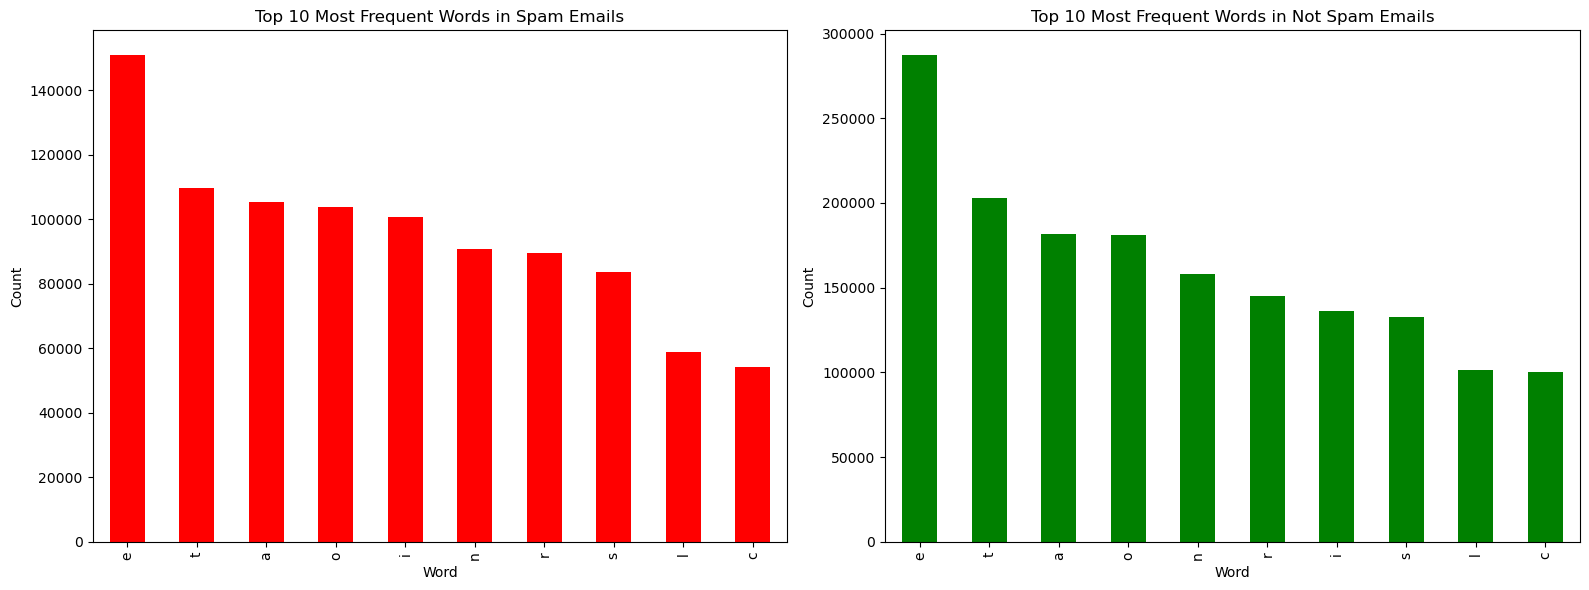

In [31]:
#Seperating Spam and not spam emails
spam_emails = data[data['Prediction'] == 1].drop(['Email No.', 'Prediction'], axis=1)
not_spam_emails = data[data['Prediction'] == 0].drop(['Email No.', 'Prediction'], axis=1)

#Most Frequent Words (top 10)
top_words = 10
word_counts_spam = spam_emails.sum().nlargest(top_words)
word_counts_not_spam = not_spam_emails.sum().nlargest(top_words)

plt.figure(figsize=(16, 6))
#Bar plot for spam emails
plt.subplot(1, 2, 1)
word_counts_spam.plot(kind='bar', color='red')
plt.title('Top 10 Most Frequent Words in Spam Emails')
plt.xlabel('Word')
plt.ylabel('Count')

#Bar plot for not spam emails
plt.subplot(1, 2, 2)
word_counts_not_spam.plot(kind='bar', color='green')
plt.title('Top 10 Most Frequent Words in Not Spam Emails')
plt.xlabel('Word', fontsize =10)
plt.ylabel('Count')

plt.tight_layout()
plt.show()


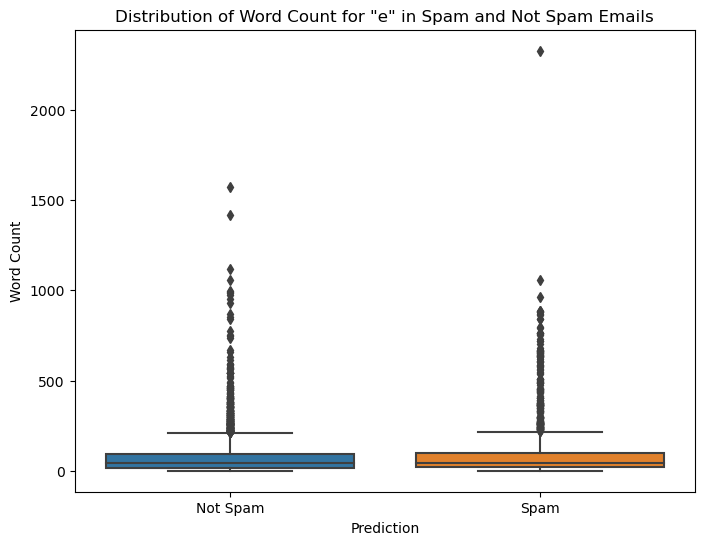

In [28]:
# Box Plot of Word Counts
plt.figure(figsize=(8, 6))
sns.boxplot(x='Prediction', y='e', data=data)
plt.title('Distribution of Word Count for "e" in Spam and Not Spam Emails')
plt.xlabel('Prediction')
plt.ylabel('Word Count')
plt.xticks(ticks=[0, 1], labels=['Not Spam', 'Spam'])
plt.show()

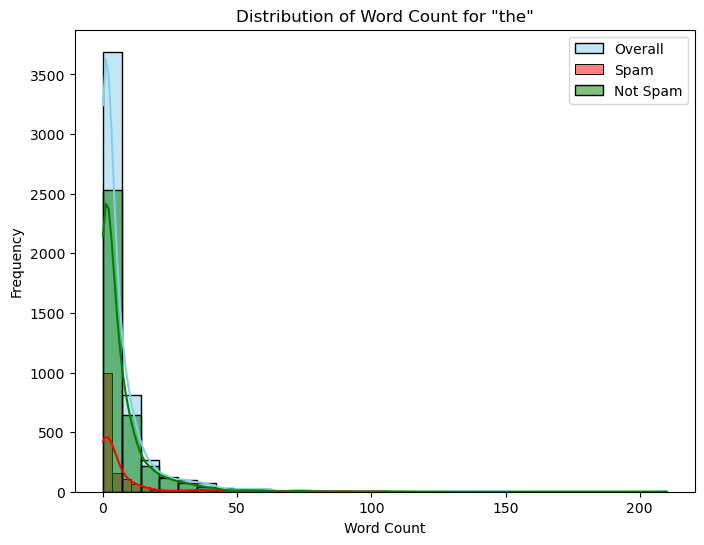

In [45]:
#Histogram of word count 'the'
plt.figure(figsize=(8, 6))
sns.histplot(data['the'], bins=30, color='skyblue', kde=True, label='Overall')
sns.histplot(spam_emails['the'], bins=30, color='red', kde=True, label='Spam')
sns.histplot(not_spam_emails['the'], bins=30, color='green', kde=True, label='Not Spam')
plt.title('Distribution of Word Count for "the"')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# LOGISTIC REGRESSION

In [65]:
#Target Variable is Prediction
X = data.drop(['Email No.', 'Prediction'], axis=1) 
y = data['Prediction']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
lr = LogisticRegression()

#training the model
lr.fit(X_train, y_train)

#Predicting(testing)
y_pred_lr = lr.predict(X_test)

E:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [106]:
# Calculate accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"LR Accuracy: {accuracy_lr:.2f}")
# Evaluate the logistic regression model
print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

LR Accuracy: 0.97
Logistic Regression:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       739
           1       0.93      0.96      0.95       296

    accuracy                           0.97      1035
   macro avg       0.96      0.97      0.96      1035
weighted avg       0.97      0.97      0.97      1035



Confusion Matrix:
[[719  20]
 [ 12 284]]


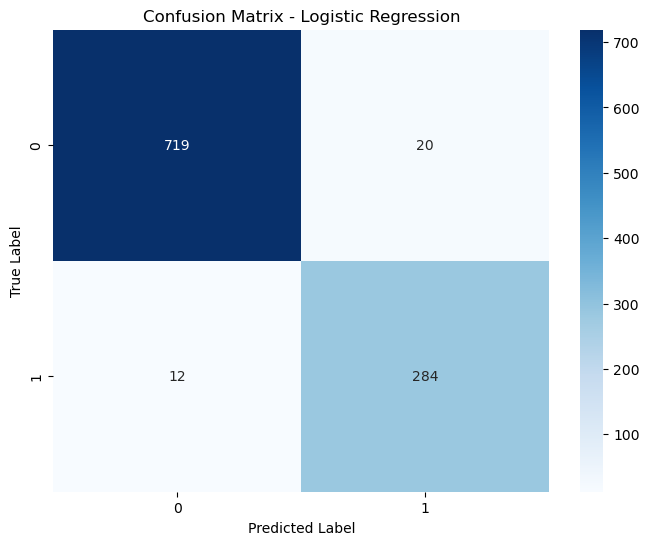

In [6]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

#Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt="d", cmap="Blues")
plt.title("LR Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

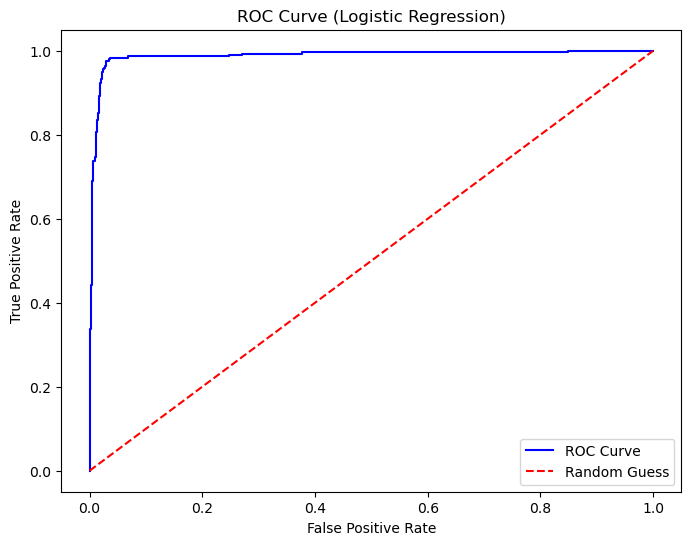

In [50]:
y_probs_lr = lr.predict_proba(X_test)[:, 1]  #Spam probability

#ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_lr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Logistic Regression)')
plt.legend()
plt.show()

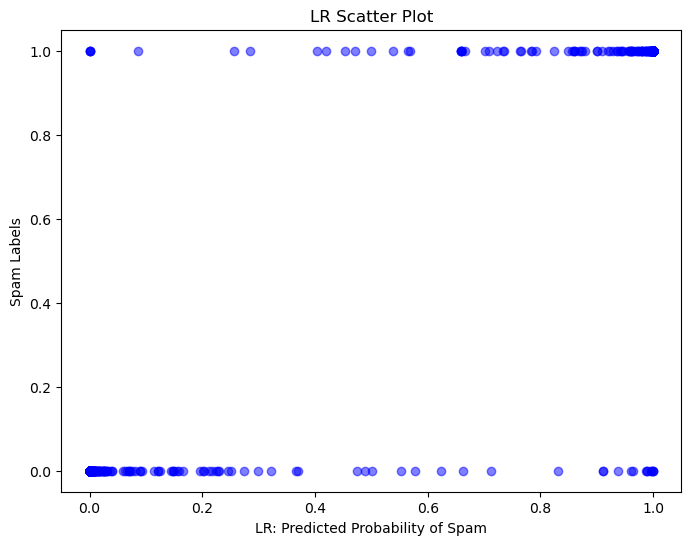

In [85]:
#Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_probs_lr, y_test, color='blue', alpha=0.5)
plt.xlabel('LR: Predicted Probability of Spam')
plt.ylabel('Spam Labels')
plt.title('LR Scatter Plot')
plt.show()

# SVM Classifier

In [71]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm = SVC(probability = True)

#hyperparameters
param_grid = {
    'C': [0.1, 1, 10, 100], 
    'kernel': ['linear', 'rbf'],  
}

#GridSearchCV
svm_grid = GridSearchCV(svm, param_grid, cv=3, scoring='accuracy', verbose=2)
svm_grid.fit(X_train, y_train)
print("Best Parameters:", svm_grid.best_params_)

#Predictions on best parameters
y_pred_svm = svm_grid.predict(X_test)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END ...............................C=0.1, kernel=linear; total time=  19.7s
[CV] END ...............................C=0.1, kernel=linear; total time=  17.4s
[CV] END ...............................C=0.1, kernel=linear; total time=  16.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=  57.1s
[CV] END ..................................C=0.1, kernel=rbf; total time= 1.0min
[CV] END ..................................C=0.1, kernel=rbf; total time=  59.7s
[CV] END .................................C=1, kernel=linear; total time=  15.7s
[CV] END .................................C=1, kernel=linear; total time=  15.1s
[CV] END .................................C=1, kernel=linear; total time=  19.2s
[CV] END ....................................C=1, kernel=rbf; total time= 1.4min
[CV] END ....................................C=1, kernel=rbf; total time=  56.2s
[CV] END ....................................C=1,

In [108]:
#predictions using the best paramater
y_pred_svm = svm_grid.predict(X_test)

#accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.2f}")

#classification report
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.96
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       739
           1       0.92      0.96      0.94       296

    accuracy                           0.96      1035
   macro avg       0.95      0.96      0.96      1035
weighted avg       0.96      0.96      0.96      1035



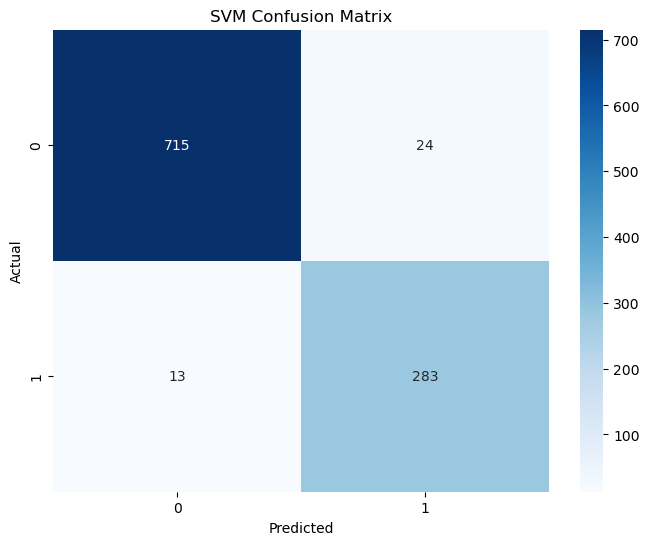

In [110]:
#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

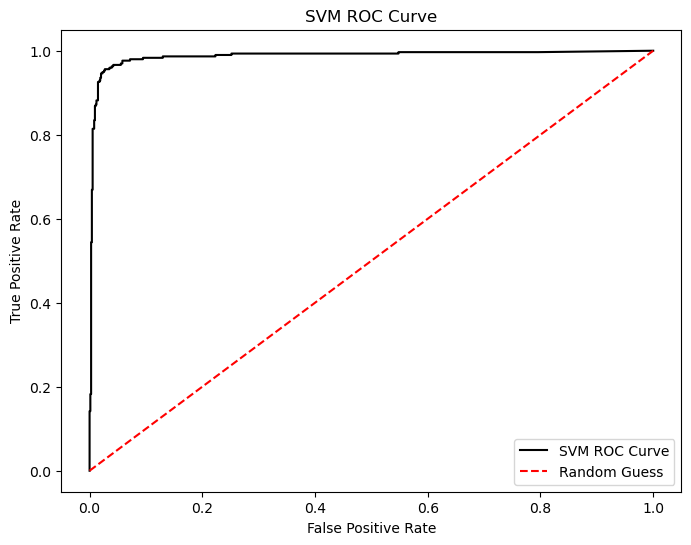

In [88]:
#positive class (spam) for ROC curve
y_probs_svm = svm_grid.predict_proba(X_test)[:, 1]

#ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_svm)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='black', label='SVM ROC Curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend()
plt.show()

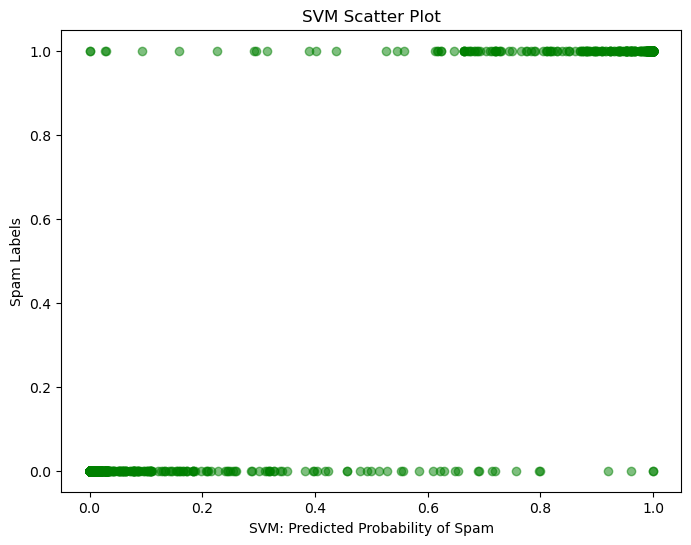

In [86]:
#scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_probs_svm, y_test, color='green', alpha=0.5)
plt.xlabel('SVM: Predicted Probability of Spam')
plt.ylabel('Spam Labels')
plt.title('SVM Scatter Plot')
plt.show()


# Comparision of two classifiers (LR and SVM)

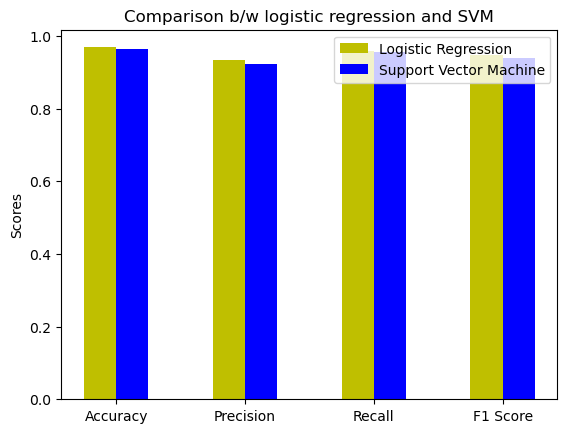

In [105]:
import matplotlib.pyplot as plt
import numpy as np

#Logistic Regression
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision, lr_recall, lr_f1_score, _ = precision_recall_fscore_support(y_test, y_pred_lr, average='binary')

#Support Vector Machine
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision, svm_recall, svm_f1_score, _ = precision_recall_fscore_support(y_test, y_pred_svm, average='binary')

#lists for metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
lr_scores = [lr_accuracy, lr_precision, lr_recall, lr_f1_score]
svm_scores = [svm_accuracy, svm_precision, svm_recall, svm_f1_score]

#Comparision plot
x = np.arange(len(metrics))
width = 0.25

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, lr_scores, width, label='Logistic Regression', color='y')
rects2 = ax.bar(x + width/2, svm_scores, width, label='Support Vector Machine', color='b')

ax.set_ylabel('Scores')
ax.set_title('Comparison b/w Logistic Regression and SVM')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.show()

In [109]:
print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       739
           1       0.93      0.96      0.95       296

    accuracy                           0.97      1035
   macro avg       0.96      0.97      0.96      1035
weighted avg       0.97      0.97      0.97      1035

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       739
           1       0.92      0.96      0.94       296

    accuracy                           0.96      1035
   macro avg       0.95      0.96      0.96      1035
weighted avg       0.96      0.96      0.96      1035



# Summary

* About dataset:The dataset 'emails.csv' contains information on 5172 email files, each represented by a row in the dataset. Each email is characterized by 3000 columns representing the most common words found in the emails, with counts of occurrences for each word. Additionally, the dataset includes a 'Prediction' column indicating whether each email is classified as spam (1) or not spam (0). 
* Data Preprocessing: The first observation reveals that the dataset may contain missing values, which can impact model training. Thus, preprocessing steps such as handling missing values is necessary before building the model. After the data preprocessing, the missing values are none in my dataset.
* Data Visualization: Initially in order to understand the distribution and characteristics of spam and not spam emails within the dataset. By analyzing the frequency of the most common words in both spam and not spam emails,I have gained insights into the distinguishing features of each category. Through bar plots showcasing the top 10 words in spam and not spam emails,I observed a  pattern in word usage that may serve as discriminative features for classification. Furthermore, I visualized histograms of word counts for specific keywords, such as the first word in the dataset: 'the', to observe differences in distribution between spam and not spam emails. These visualizations provided a comparative view of how frequently certain words appear in both categories, offering valuable clues for feature selection and model training.
* Classifiers: I have taken two classifiers for this project : Logistic regression and Support vector machines classfiers.  Logistic regression is a linear model that estimates the probability of a binary outcome, making it suitable for binary classification tasks like spam detection. On the other hand, SVM is a versatile classifier that can handle linear and non-linear decision boundaries, offering flexibility in capturing complex patterns in the data. By visualizing the top words in spam and not spam emails and plotting histograms of word counts, we gained a better understanding of the dataset's characteristics and potential features influencing email classification. 
* Conclusion: The comparison between logistic regression and SVM revealed that both classifiers achieved high accuracy and performed well in distinguishing between spam and not spam emails. The Logistic Regression Classifier is the best model with 97% accuracy for this project. The end result of the analysis is a robust and efficient solution for combating email spam, with the help of this well developed logistic regression model. This model can be deployed to automatically categorize incoming emails, providing users with a reliable defense against spam and enhancing overall email security.